[4, 4, 2, 3, 3, 1, 1, 1, 4, 3, 2, 3, 3, 1, 3, 1, 4, 3]
accuray is 0.5


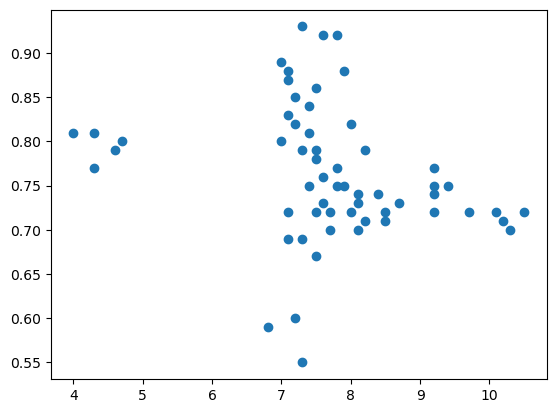

In [6]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def euc_dist(x1,x2):
    dist=np.sqrt(np.sum((x1-x2)**2))
    return dist

def man_dist(x1,x2):
    dist=np.sum(np.abs(x1-x2))
    return dist

class KNN:
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
        
    def predict(self,X):
        predictions=[self._predict(x) for x in X]
        return predictions
    
    def _predict(self,x):
        distance=[man_dist(x,x_train) for x_train in self.X_train]
        k_indices=np.argsort(distance)[:self.k]
        k_nearest_labels=[self.y_train[i] for i in k_indices]
        most_common=Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
df=pd.read_csv('./glass.csv')
y=df['Type'].values
X=df.drop('Type',axis=1).values

df=pd.read_csv('./fruits.csv')
y=df['fruit_label'].values
X=df[['mass','width','height','color_score']].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=KNN(k=3)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)

print(prediction)
accuracy=np.sum(prediction==y_test)/len(y_test)
print("accuray is",accuracy)
plt.scatter(X[:,2],X[:,3])
plt.show()


predictions [3, 3, 3, 3, 4, 3, 2, 1, 4, 4, 1, 1]
accuracy: 0.5833333333333334


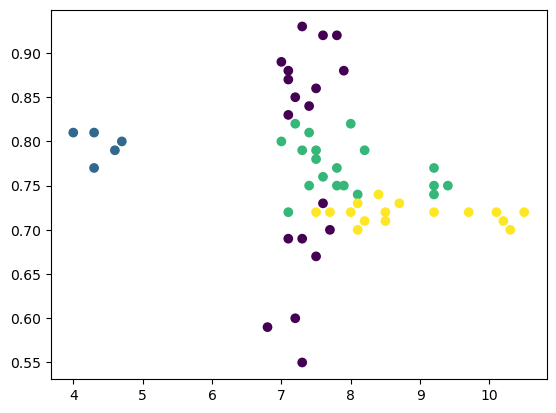

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix

df=pd.read_csv('./fruits.csv')
y=df['fruit_label'].values
X=df[['mass','width','height','color_score']].values

def euc_dist(x1,x2):
    dist=np.sqrt(np.sum((x1-x2)**2))
    return dist

def man_dist(x1,x2):
    dist=np.sum(np.abs(x1-x2))
    return dist

class KNN:
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
        
    def predict(self,X):
        prediction=[self._predict(x) for x in X]
        return prediction
    
    def _predict(self,x):
        distances=[euc_dist(x,x_train) for x_train in self.X_train]
        k_indices=np.argsort(distances)[:self.k]
        k_nearest_labels=[self.y_train[i] for i in k_indices]
        most_common=Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    
clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print("predictions",predictions)
accuracy=accuracy_score(y_test,predictions)
print("accuracy:",accuracy)
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()

